In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy  as np 

In [3]:
data=pd.read_csv(r'C:\Users\FORMAT\Desktop\New folder\data\salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
from sklearn.impute import SimpleImputer
for col in data.columns:
    if data[col].dtype=='object':
        s=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
        data[col]=s.fit_transform(data.loc[:,col].values.reshape(-1,1))
    else:
        s=SimpleImputer(missing_values=np.nan,strategy="median")
        data[col]=s.fit_transform(data.loc[:,col].values.reshape(-1,1))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  float64
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  float64
 14  salary          32561 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


In [45]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype=='object':
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  float64
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  float64
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  float64
 6   occupation      32561 non-null  float64
 7   relationship    32561 non-null  float64
 8   race            32561 non-null  float64
 9   sex             32561 non-null  float64
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  float64
 14  salary          32561 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


C:\Users\FORMAT\AppData\Local\Temp\ipykernel_4668\1658273527.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=0.9)


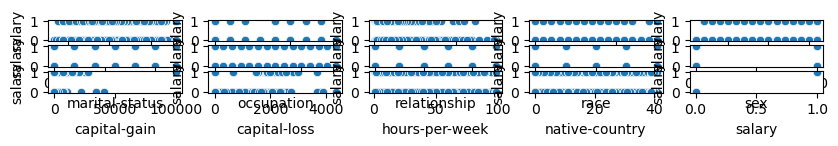

In [46]:
plt.figure(figsize=(10,10))
x=1
for col in data.columns:
    plt.subplot(30,5,x)
    sns.scatterplot(x=col, y='salary', data=data)
    x+=1
plt.tight_layout(pad=0.9)
plt.show()

<AxesSubplot:>

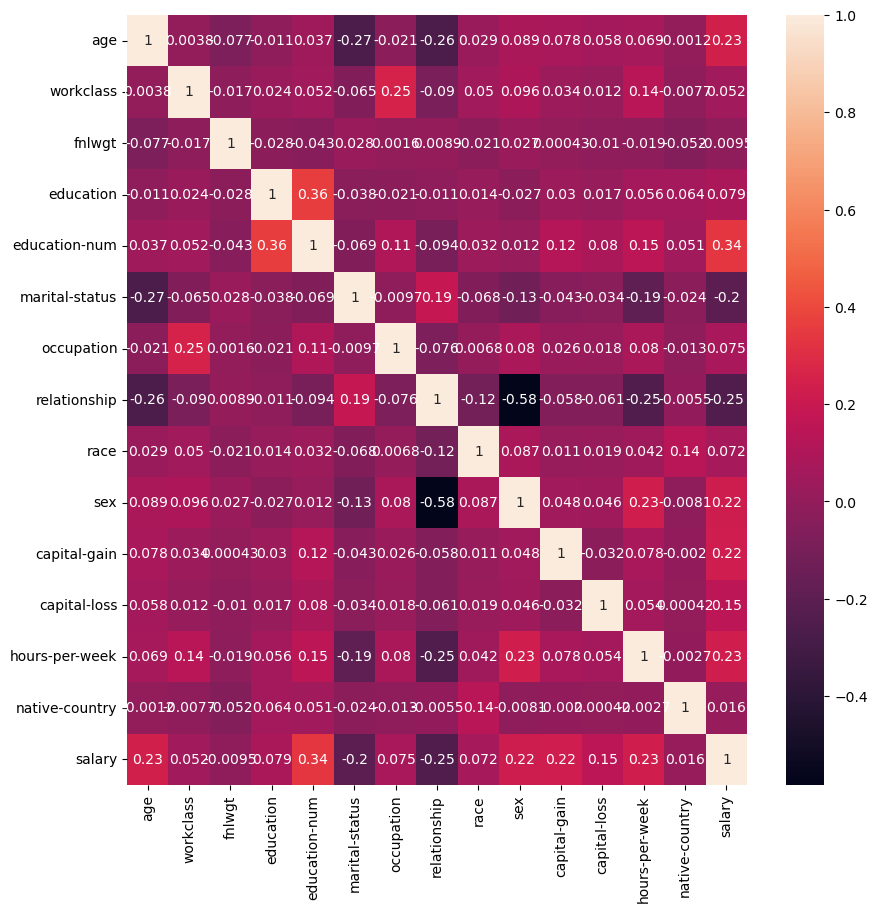

In [37]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(),annot=True)

In [53]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.9)

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)
y_pred=model.predict(test_X)

In [55]:
from sklearn.metrics import r2_score
r2_score(y_pred,test_y)

-1.5844354562030896